# Test Receptive Field

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
import models
from PIL import Image
import matplotlib.pyplot as plt
img_size = 224
num_classes = 2
import utils_resnet_TL as utils_resnet

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = 'cpu'
print('Device:', device)
num_gpu = torch.cuda.device_count()
print('Number of available GPUs:', num_gpu)

Device: cuda:0
Number of available GPUs: 8


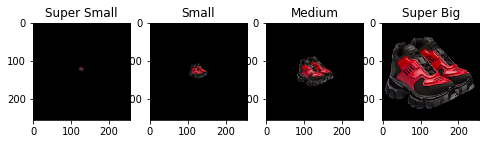

In [2]:
super_small = Image.open('SuperSmall.png').convert('RGB')
small = Image.open('Small.png').convert('RGB')
medium = Image.open('Medium.png').convert('RGB')
super_big = Image.open('SuperBig.png').convert('RGB')

fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1, 4, 1)
plt.imshow(super_small)
plt.title('Super Small')

fig.add_subplot(1, 4, 2)
plt.imshow(small)
plt.title('Small')

fig.add_subplot(1, 4, 3)
plt.imshow(medium)
plt.title('Medium')

fig.add_subplot(1, 4, 4)
plt.imshow(super_big)
plt.title('Super Big')

plt.show()

In [17]:
#transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(img_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.RandomResizedCrop(img_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
}

In [18]:
ResnetFeatures = utils_resnet.resnet50(models.ResnetFeatures, pretrained=True)
# Freeze Layers
ResnetFeatures.set_parameter_requires_grad(feature_extracting=True)
ResnetFeatures.eval();

In [19]:
upsample = nn.UpsamplingBilinear2d(size=(img_size, img_size))

In [34]:
super_small_pytorch = data_transforms['val'](super_small).unsqueeze(0)
small_pytorch = data_transforms['val'](small).unsqueeze(0)
medium_pytorch = data_transforms['val'](medium).unsqueeze(0)
super_big_pytorch = data_transforms['val'](super_big).unsqueeze(0)

feat_reference_super_small = ResnetFeatures(super_small_pytorch)
feat_reference_small = ResnetFeatures(small_pytorch)
feat_reference_medium = ResnetFeatures(medium_pytorch)
feat_reference_big = ResnetFeatures(super_big_pytorch)

_, cp3_super_small,cp4_super_small,cp5_super_small = feat_reference_super_small
_, cp3_small,cp4_small,cp5_small = feat_reference_small
_, cp3_medium,cp4_medium,cp5_medium = feat_reference_medium
_, cp3_big,cp4_big,cp5_big = feat_reference_big

# Bring all features to the same size
cp3_super_small = upsample(cp3_super_small)
cp3_small = upsample(cp3_small)
cp3_medium = upsample(cp3_medium)
cp3_big = upsample(cp3_big)

cp4_super_small = upsample(cp4_super_small)
cp4_small = upsample(cp4_small)
cp4_medium = upsample(cp4_medium)
cp4_big = upsample(cp4_big)

cp5_super_small = upsample(cp5_super_small)
cp5_small = upsample(cp5_small)
cp5_medium = upsample(cp5_medium)
cp5_big = upsample(cp5_big)

cp3_super_small = torch.sum(cp3_super_small, dim=1).squeeze(0)
cp3_small = torch.sum(cp3_small, dim=1).squeeze(0)
cp3_medium = torch.sum(cp3_medium, dim=1).squeeze(0)
cp3_big = torch.sum(cp3_big, dim=1).squeeze(0)

cp4_super_small = torch.sum(cp4_super_small, dim=1).squeeze(0)
cp4_small = torch.sum(cp4_small, dim=1).squeeze(0)
cp4_medium = torch.sum(cp4_medium, dim=1).squeeze(0)
cp4_big = torch.sum(cp4_big, dim=1).squeeze(0)

cp5_super_small = torch.sum(cp5_super_small, dim=1).squeeze(0)
cp5_small = torch.sum(cp5_small, dim=1).squeeze(0)
cp5_medium = torch.sum(cp5_medium, dim=1).squeeze(0)
cp5_big = torch.sum(cp5_big, dim=1).squeeze(0)

#### Super Small

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


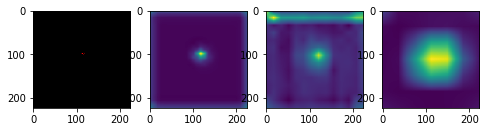

In [35]:
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1, 4, 1)
plt.imshow(super_small_pytorch.squeeze(0).permute(1, 2, 0).cpu().numpy())
fig.add_subplot(1, 4, 2)
plt.imshow(cp3_super_small)
fig.add_subplot(1, 4, 3)
plt.imshow(cp4_super_small)
fig.add_subplot(1, 4, 4)
plt.imshow(cp5_super_small)
plt.show()

#### Small

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


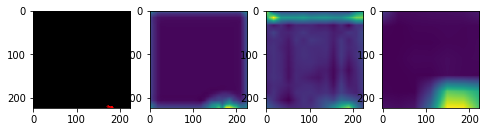

In [36]:
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1, 4, 1)
plt.imshow(small_pytorch.squeeze(0).permute(1, 2, 0).cpu().numpy())
fig.add_subplot(1, 4, 2)
plt.imshow(cp3_small)
fig.add_subplot(1, 4, 3)
plt.imshow(cp4_small)
fig.add_subplot(1, 4, 4)
plt.imshow(cp5_small)
plt.show()

#### Medium

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


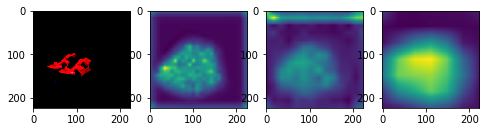

In [37]:
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1, 4, 1)
plt.imshow(medium_pytorch.squeeze(0).permute(1, 2, 0).cpu().numpy())
fig.add_subplot(1, 4, 2)
plt.imshow(cp3_medium)
fig.add_subplot(1, 4, 3)
plt.imshow(cp4_medium)
fig.add_subplot(1, 4, 4)
plt.imshow(cp5_medium)
plt.show()

#### Super Big

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


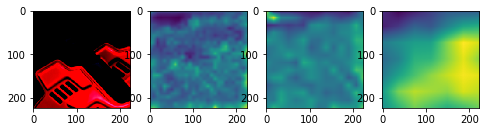

In [38]:
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1, 4, 1)
plt.imshow(super_big_pytorch.squeeze(0).permute(1, 2, 0).cpu().numpy())
fig.add_subplot(1, 4, 2)
plt.imshow(cp3_big)
fig.add_subplot(1, 4, 3)
plt.imshow(cp4_big)
fig.add_subplot(1, 4, 4)
plt.imshow(cp5_big)
plt.show()